# Solution: Distances and Heatmaps

We will:
1. Load `example_day5.csv`
2. Compute Euclidean distance between observations (rows)
3. Plot a heatmap of this distance matrix
4. Compute correlation distance between variables (columns)
5. Plot a heatmap of this distance matrix


In [ ]:
# 1. Load the dataset

import pandas as pd

df = pd.read_csv("../data/day5_example.csv")
df.head()

,Gene1,Gene2,Gene3
0,0.524097,-0.047710,-0.545653
1,-2.260768,-1.519615,-0.398969
2,-0.019680,0.794936,0.585381
3,0.183140,-0.144233,0.163862
4,-0.361351,-0.706498,0.141025
...,...,...,...
95,4.024846,4.384771,4.637117
96,2.036715,3.828056,1.875386
97,2.940309,3.268670,2.116704
98,0.848200,2.825186,4.056652


In [ ]:
# 2. Euclidean distance between observations (rows)
from sklearn.metrics import pairwise_distances

# Using sklearn for compactness; scipy pdist/squareform would also work
D_euclid = pairwise_distances(df.iloc[:,1:].values, metric="euclidean")
D_euclid_df.round(3).head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.000,3.153,1.512,0.793,1.300,1.643,2.066,1.100,2.307,1.353,...,3.386,6.068,4.604,6.507,6.073,7.666,4.814,4.891,5.435,6.433
1,3.153,0.000,3.369,2.860,2.136,2.939,3.248,2.338,3.146,4.080,...,5.769,8.039,6.613,8.983,8.648,9.987,7.228,7.504,6.957,8.571
2,1.512,3.369,0.000,1.049,1.603,0.500,0.719,2.248,1.060,1.162,...,2.625,4.928,3.454,5.928,5.388,6.757,3.885,4.150,4.114,5.377
3,0.793,2.860,1.049,0.000,0.783,1.087,1.590,1.410,1.841,1.526,...,3.102,5.710,4.237,6.314,5.933,7.435,4.706,4.802,4.941,6.138
4,1.300,2.136,1.603,0.783,0.000,1.391,1.904,1.231,2.046,2.255,...,3.753,6.292,4.830,6.942,6.625,8.085,5.415,5.532,5.410,6.761


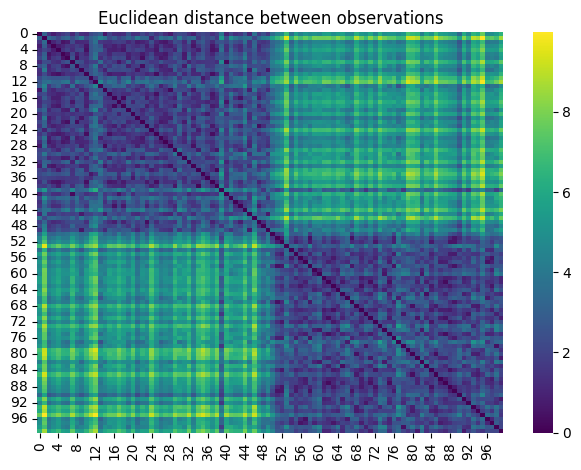

In [ ]:
# 3. Heatmap of Euclidean distances

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
sns.heatmap(D_euclid_df, cmap="viridis")
plt.title("Euclidean distance between observations")
plt.tight_layout()
plt.show()

In [ ]:
# 4. Correlation distance between variables (columns)

corr = df.iloc[:,1:].corr(method="pearson")
D_corr_vars = 1 - corr
D_corr_vars.round(3)

,Gene1,Gene2,Gene3
Gene1,0.000,0.337,0.299
Gene2,0.337,0.000,0.314
Gene3,0.299,0.314,0.000


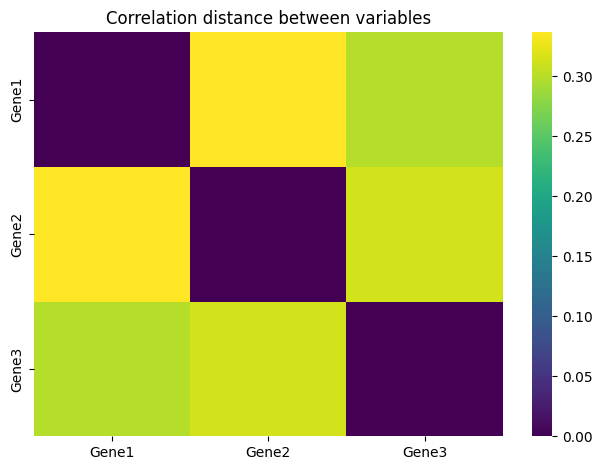

In [ ]:
# 5. Heatmap of correlation distance (variables)
plt.figure()
sns.heatmap(D_corr_vars, cmap="viridis", vmin=0, vmax=2)
plt.title("Correlation distance between variables")
plt.tight_layout()
plt.show()